# 시계열 분석
## 시계열 데이터 발견과 정리

In [ ]:
import pandas as pd
import io
import requests

In [ ]:
YearJoined = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/year_joined.csv")

In [ ]:
emails = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/emails.csv")

In [ ]:
donations = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/donations.csv")

In [ ]:
YearJoined.groupby('user').count().groupby('userStats').count()

yearJoined
userStats            
1                1000

In [ ]:
emails[emails.emailsOpened < 1]

Empty DataFrame
Columns: [emailsOpened, user, week]
Index: []

In [ ]:
emails[emails.user == 998]

emailsOpened   user                 week
25464           1.0  998.0  2017-12-04 00:00:00
25465           3.0  998.0  2017-12-11 00:00:00
25466           3.0  998.0  2017-12-18 00:00:00
25467           3.0  998.0  2018-01-01 00:00:00
25468           3.0  998.0  2018-01-08 00:00:00
25469           2.0  998.0  2018-01-15 00:00:00
25470           3.0  998.0  2018-01-22 00:00:00
25471           2.0  998.0  2018-01-29 00:00:00
25472           3.0  998.0  2018-02-05 00:00:00
25473           3.0  998.0  2018-02-12 00:00:00
25474           3.0  998.0  2018-02-19 00:00:00
25475           2.0  998.0  2018-02-26 00:00:00
25476           2.0  998.0  2018-03-05 00:00:00
25477           3.0  998.0  2018-03-12 00:00:00
25478           2.0  998.0  2018-03-19 00:00:00
25479           2.0  998.0  2018-03-26 00:00:00
25480           3.0  998.0  2018-04-02 00:00:00
25481           3.0  998.0  2018-04-09 00:00:00
25482           3.0  998.0  2018-04-16 00:00:00
25483           3.0  998.0  2018-04-30 00:00:00
25484           3.0  998.0  2018-05-07 00:00:00
25485           3.0  998.0  2018-05-14 00:00:00
25486           3.0  998.0  2018-05-21 00:00:00
25487           3.0  998.0  2018-05-28 00:00:00

In [ ]:
import datetime
date_time_str_max = max(emails[emails.user == 998].week)
date_time_str_min = min(emails[emails.user == 998].week)

date_time_obj_max = datetime.datetime.strptime(date_time_str_max, '%Y-%m-%d %H:%M:%S')
date_time_obj_min = datetime.datetime.strptime(date_time_str_min, '%Y-%m-%d %H:%M:%S')

(date_time_obj_max - date_time_obj_min).days/7

25.0

In [ ]:
emails[emails.user == 998].shape

(24, 3)

- 시계열 분석에 있어서 타임스태프는 꽤 유용. 타임스템프를 활용하면 시간이나 요일과 같은 흥미로운 많은 특징을 추정해볼 수 있음. 하지만 타임스탬프는 다루기가 매우 어려움

In [ ]:
air = pd.read_csv("https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/AirPassengers.csv", names=['Date', 'Passengers'])

In [ ]:
air

Date  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]

In [ ]:
air['Smooth.5'] = air.ewm(alpha = .5).Passengers.mean()
air['Smooth.9'] = air.ewm(alpha = .9).Passengers.mean()

In [ ]:
air

Date  Passengers    Smooth.5    Smooth.9
0    1949-01         112  112.000000  112.000000
1    1949-02         118  116.000000  117.454545
2    1949-03         132  125.142857  130.558559
3    1949-04         129  127.200000  129.155716
4    1949-05         121  124.000000  121.815498
..       ...         ...         ...         ...
139  1960-08         606  582.096411  606.665454
140  1960-09         508  545.048205  517.866545
141  1960-10         461  503.024103  466.686655
142  1960-11         390  446.512051  397.668665
143  1960-12         432  439.256026  428.566867

[144 rows x 4 columns]

In [ ]:
import datetime
datetime.datetime.utcnow()

datetime.datetime(2024, 6, 30, 16, 3, 25, 654386)

In [ ]:
datetime.datetime.now()

datetime.datetime(2024, 6, 30, 16, 3, 25, 670373)

In [ ]:
datetime.datetime.now(datetime.timezone.utc)

datetime.datetime(2024, 6, 30, 16, 3, 25, 684322, tzinfo=datetime.timezone.utc)

## 대표적인 시계열 변수추출 방향 7종 (Feature Engineering)

> **데이터 과학자로서 이미 수동/자동 변수 생성(Feature Engineering)에 익숙하지만, 신규 변수를 생성하는 것은 분석에서 가장 중요하고 시간이 많이 걸리는 작업 중 하나**
>> **"변수 생성시 주의할 점!"**  
>> 1) 미래의 실제 종속변수 예측값이 어떤 독립/종속변수의 FE에 의해 효과가 있을지 단정할 수 없음  
>> 2) 독립변수의 예측값을 FE를 통해 생성될 수 있지만 이는 종속변수의 예측에 오류증가를 야기할 수 있음  


- **빈도(Frequency)**: 계절성 패턴(Seasonality)이 나타나기 전까지의 데이터 갯수로 사람이 정해야 함

> 예시: 계설성이 1년에 1회 나타날 경우,  
    
| Data | frequency |
|-----------|-----------|
| Annual | 1 |
| Quarterly | 4 |
| Monthly | 12 |
| Weekly | 52 |

> 예시: 데이터가 "일(Day)" 단위로 수집된 경우,  
   
| Seasonality | frequency |
|-------------|-----------|
| Weekly | 7 |
| Annual | 365 |

> 예시: 데이터가 "분(Minute)" 단위로 수집된 경우,  
    
| Seasonality | frequency |
|-------------|-----------|
| Hourly | 60 |
| Daily | 24 x 60 |
| Weekly | 24 x 60 x 7 |
| Annual | 24 x 60 x 365 |

> 빈도 설정을 위한 Python 함수 옵션:

| Alias | Description |
|--------|-----------------------|
| B | Business day |
| D | Calendar day |
| W | Weekly |
| M | Month end |
| Q | Quarter end |
| A | Year end |
| BA | Business year end |
| AS | Year start |
| H | Hourly frequency |
| T, min | Minutely frequency |
| S | Secondly frequency |
| L, ms | Millisecond frequency |
| U, us | Microsecond frequency |
| N, ns | Nanosecond frequency |

| Method | Description |
|---------|-----------------------------------------------------------|
| bfill | Backward fill |
| count | Count of values |
| ffill | Forward fill |
| first | First valid data value |
| last | Last valid data value |
| max | Maximum data value |
| mean | Mean of values in time range |
| median | Median of values in time range |
| min | Minimum data value |
| nunique | Number of unique values |
| ohlc | Opening value, highest value, lowest value, closing value |
| pad | Same as forward fill |
| std | Standard deviation of values |
| sum | Sum of values |
| var | Variance of values |

- **추세(Trend, $T_t$)**: 시계열이 시간에 따라 증가, 감소 또는 일정 수준을 유지하는 경우
    - **(수학적 이해)**
        - 확률과정의 결정론적 기댓값 함수를 알아내는 것
        - 확률과정($Y_t$)이 추정이 가능한 결정론적 추세함수($f(t)$)와 정상확률과정($Y^s_t$)의 합
        <center>$Y_t = f(t) + Y^s_t$</center>
    

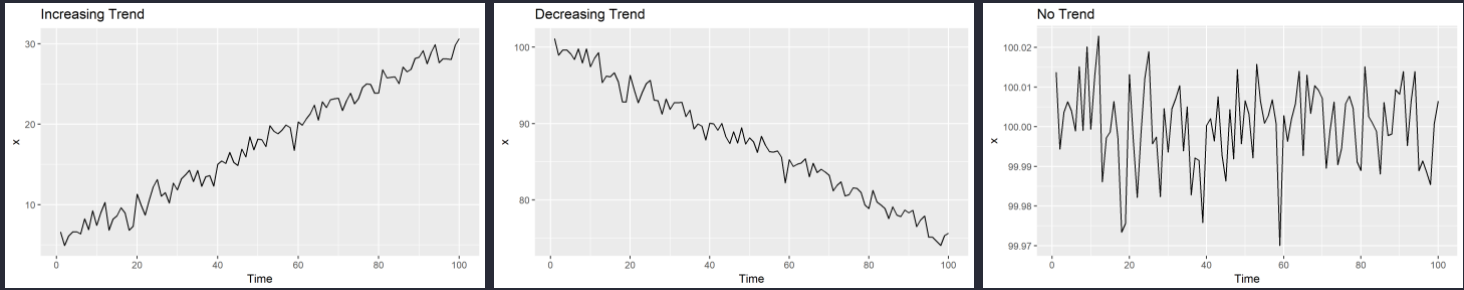

- **계절성(Seasonality, $S_t$)**: 일정한 빈도로 주기적으로 반복되는 패턴($m$), 특정한 달/요일에 따라 기대값이 달라지는 것
> 계설정 반영 방법큰 크게 2가지: 수치값 그대로, 발생 시점으로 분리  
> 주기적 패턴이 12개월마다 반복($m$ = 12)  
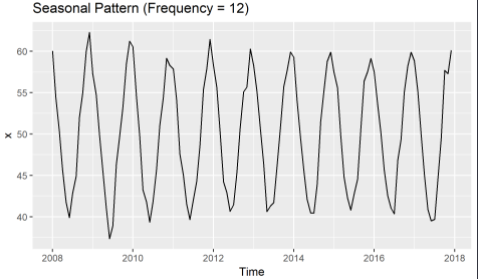

- **주기(Cycle, $C_t$)**: 일정하지 않은 빈도로 발생하는 패턴(계절성)
> 빈도가 1인 경우에도 발생 가능($m$ = 1).  
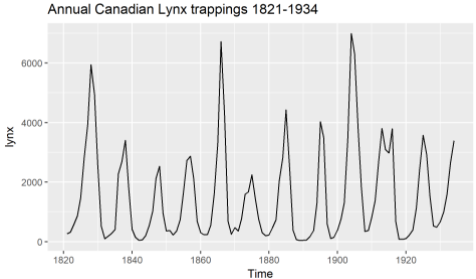

- **시계열 분해(추세/계절성/잔차(Residual, $e_t$))**:
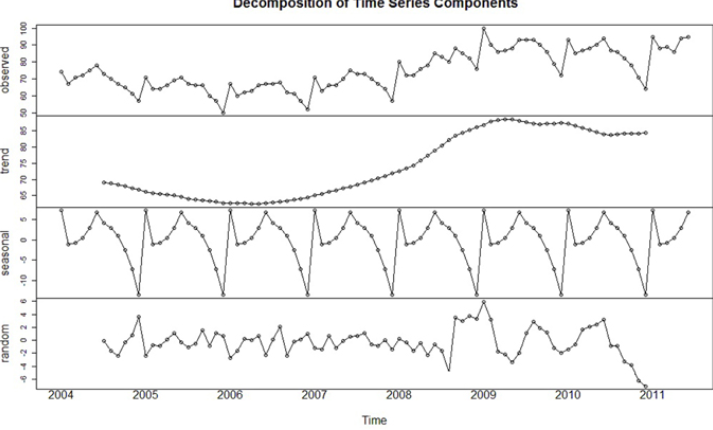

- **더미변수(Dummy Variables, $D_i$)**: 이진수(0 또는 1)의 형태로 변수를 생성하는 것으로 휴일, 이벤트, 캠페인, Outlier 등을 생성 가능
    - **생성법:**
        1. 범주형 변수(Categorical Variable)의 기준값을 미리 결정 (ex. 계절일 경우 봄)
        2. 기준값을 제외한 채 더미변수를 생성 (ex. $D_1$ = 여름, $D_2$ = 가을, $D_3$ = 겨울)
        2. 각 더미변수의 값을 0 또는 1로 채우며 1은 각 더미변수의 정의와 같음을 의미
        
> 확실한 패턴이 존재하는 경우에만 효과가 있으며 오히려 모델의 오류를 증가시킬 수 있음

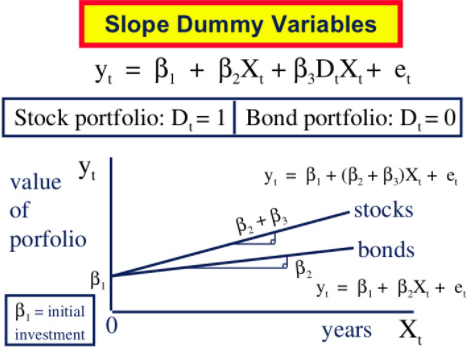

- **지연값(Lagged values, $Lag_t(X_1)$)**: 변수의 지연된 값을 독립변수로 반영하는 것으로,ARIMA/VAR/NNAR 등이 활용  
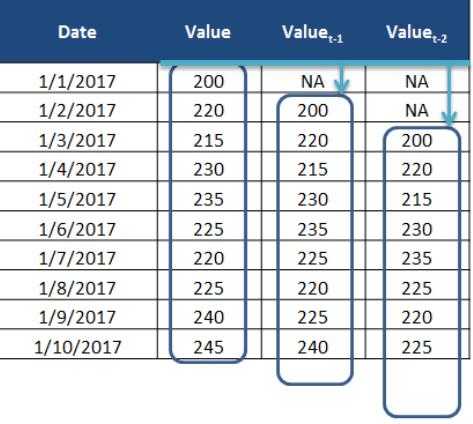

- **시간변수**: 시간변수를 미시/거시 적으로 분리하거나 통합하여 생성된 변수  

- **요약**:
    >- <U>시계열 구성요소는 각 변수의 시간패턴을 파악하는데 중요
    >- <U>FE를 통해 생성된 변수의 입력(Input) 형태로 모형 선택을 하는데 필요
    >- <U>생성된 변수의 패턴이 기존 모델에서 반영하지 않던 패턴이라면 예측 성능을 높임
    >- <U>예측성능 향상 뿐 아니라 결과를 해석하고 해당 속성을 분석하며 가능한 원인 식별에 도움

## 데이터 준비 방향

### 비시계열 데이터준비(General Validation)
> **일반적준비(Simple Validation):**
- **훈련셋(Training set):** 이름처럼 일반적으로 전체 데이터의 60%를 사용하여 기계학습을 하는데 사용됨  
- **검증셋(Validation set):**
    - 개발셋이라고도 하며, 일반적으로 전체 데이터의 20%를 사용함
    - 훈련된 여러가지 모델들의 성능을 테스트 하는데 사용되며 모델 선택의 기준이 됨
- **테스트셋(Testing set):** 전체 데이터의 20%를 사용하며 최종 모델의 정확성을 확인하는 목적에 사용됨

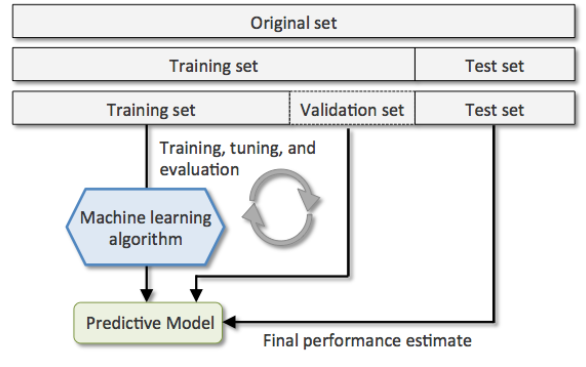

> **$K$교차검사($K$-fold Cross Validation):**  
1. 훈련셋을 복원없이 $K$개로 분리한 후, $K-1$는 하위훈련셋으로 나머지 1개는 검증셋으로 사용함  
2. 검증셋과 하위훈련셋을 번갈아가면서 $K$번 반복하여 각 모델별로 $K$개의 성능 추정치를 계산  
3. $K$개의 성능 추정치 평균을 최종 모델 성능 기준으로 사용  

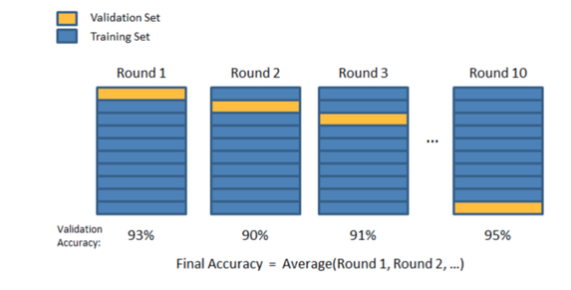

> **간단한준비(Holdout Validation):**
- **훈련셋(Training set):** 일반적으로 전체 데이터의 70% 사용
- **테스트셋(Testing set):** 일반적으로 전체 데이터의 30% 사용

> **$K$-fold vs. Random-subsamples vs. Leave-one-out vs. Leave-$p$-out**  
>- **$K$-fold**


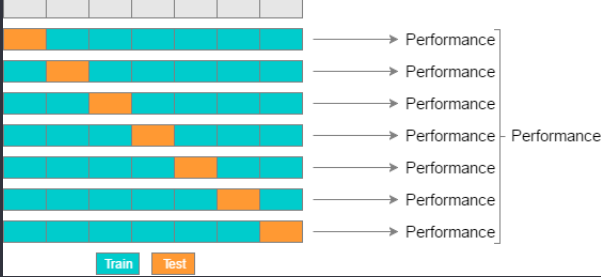

>- **Random-subsamples**


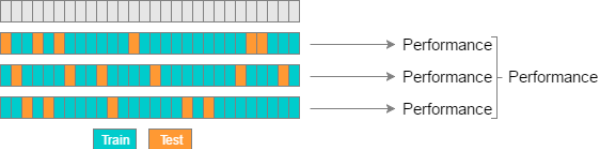

>- **Leave-one-out**


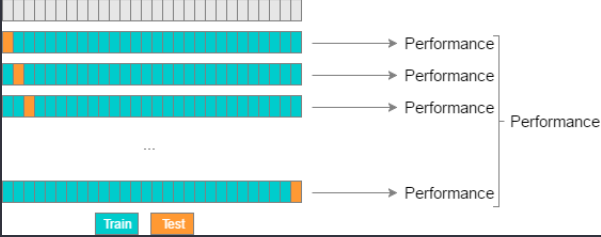

>- **Leave-$p$-out**


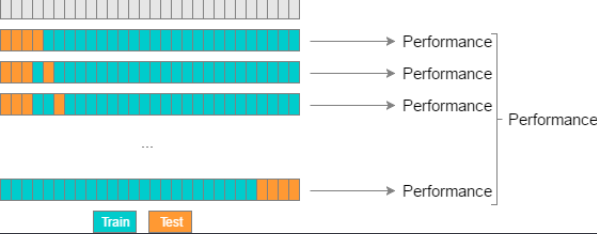

### 시계열 데이터준비(Time Series Validation)
>- **시계열 데이터인 경우 랜덤성(set.seed)을 부여하면 안되고 시간축 유지가 핵심!**
    - **훈련셋(Training set):** 가장 오래된 데이터
    - **검증셋(Validation set):** 그 다음 최근 데이터
    - **테스트셋(Testing set):** 가장 최신의 데이터

image.png



### 시계열 데이터준비(Time Series Validation)
>- **시계열 데이터인 경우 랜덤성(set.seed)을 부여하면 안되고 시간축 유지가 핵심!**
    - **훈련셋(Training set):** 가장 오래된 데이터
    - **검증셋(Validation set):** 그 다음 최근 데이터
    - **테스트셋(Testing set):** 가장 최신의 데이터

image.png

- 2스텝 교차검사(Two-step Ahead Cross-validation)

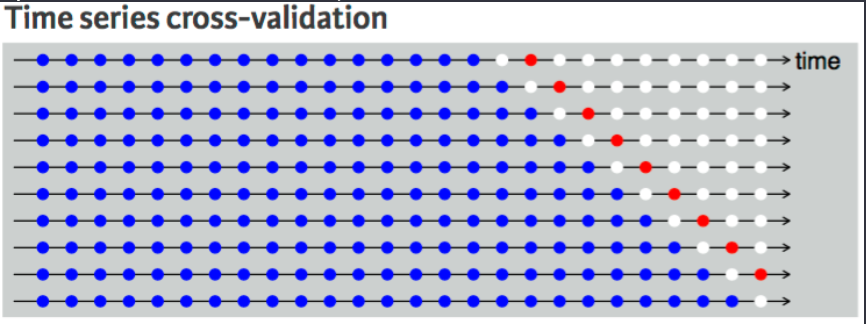


>**"학습된 도메인 영역 내의 패턴 뿐 아니라 외부 시점의로 데이터를 확장 할 수 있어야 시계열 알고리즘"**
- 시계열 데이터나 FE를 통해 생성된 변수들은 미래시점을 생성시킬 수 있음  
- 대다수의 기계학습 알고리즘은 학습된 도메인 영역에서의 패턴만을 추출

>**"시계열 알고리즘은 점추정이 아닌 구간추정 알고리즘으로 설명력 효과에 뿌리를 둠"**
- 대부분의 기계학습 모델은 통계분포에 기반하지 않기 때문에 점추정 알고리즘  
- 신뢰구간의 정확성은 확신 할 수 없지만 점추정 보다 다양한 해석을 가능하게 함

- **"정확성 vs. 설명력 반비례 관계 존재"**
>**설명력 최근 연구동향:**
    - [LIME](https://blog.fastforwardlabs.com/2017/09/01/LIME-for-couples.html)
    - [DARPA](https://bdtechtalks.com/2019/01/10/darpa-xai-explainable-artificial-intelligence/)
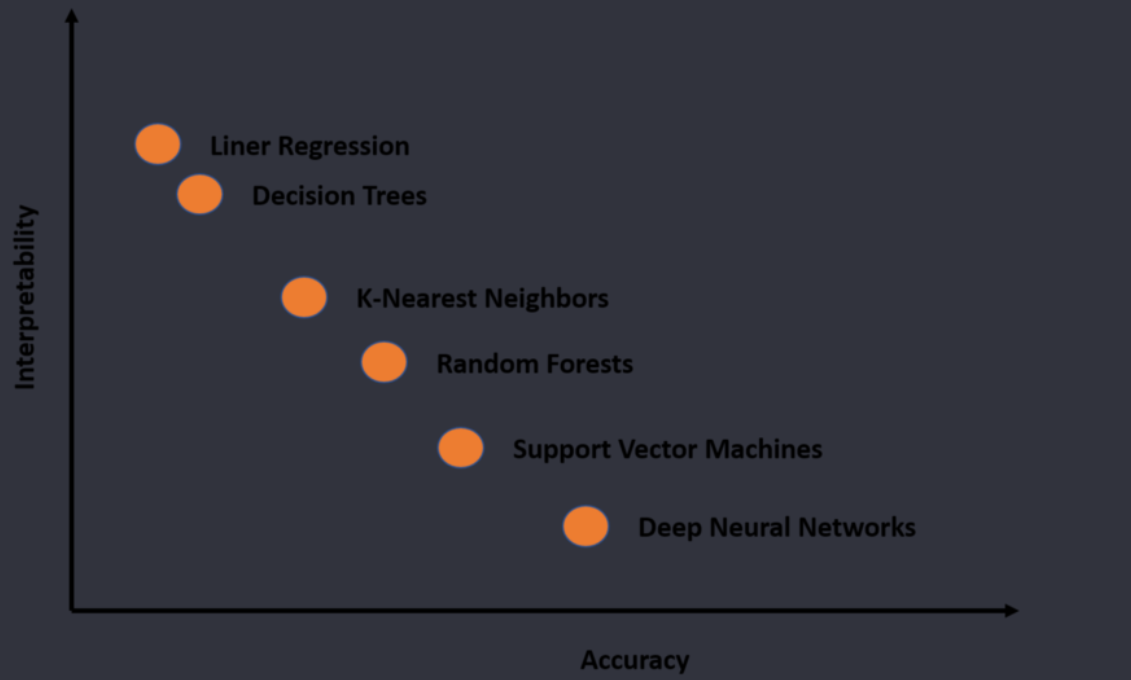
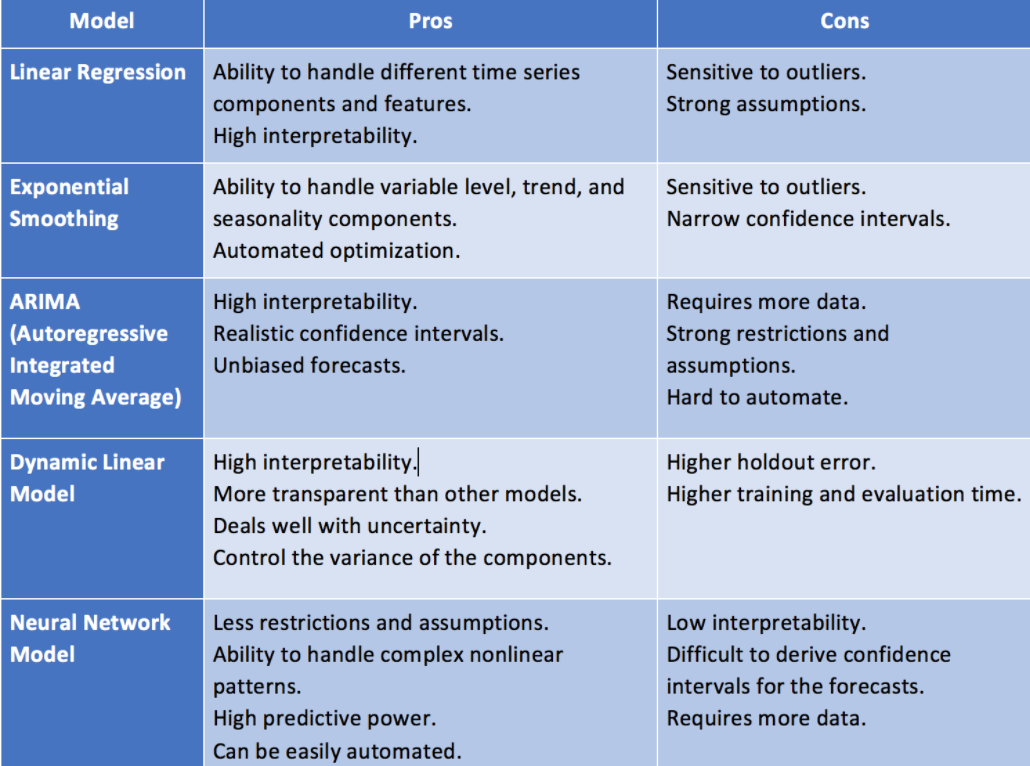

- **대표적 알고리즘 예시:**

> **Dynamic Linear Model:**
  - Bayesian-based Models
  - [Generalized Autoregressive Conditional Heteroskedasticity(GARCH)](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)
  - [Vector Autoregression(VAR)](https://en.wikipedia.org/wiki/Vector_autoregression)

> **Nueral Network Model:**
  - Neural Networks Autoregression(NNAR)
  - Recurrent Neural Network(RNN)
  - Long Short-Term Memory(LSTM)
  - Gated Recurrent Unit(GRU)


## 검증지표(Evaluation Metrics)과 잔차진단(Residuals Diagnostics) 방향
>**"예측 분석 이후 예측이 잘 되었는지 그리고 데이터의 시간패턴이 잘 추출 되었는지 평가"**
- 검증지표는 예측값과 실제값이 얼마나 비슷한지를 측정하는 것이며, 모형이 시간특성을 잘 잡아내는지를 측정하지는 않음  
- 시간특성 패턴이 잘 추출되었는지 확인하기 위해선 잔차(또는 에러) 진단을 통해 백색잡음(White Noise)과 얼마나 유사한지 측정=> <U>"Residual Diagnostics" or "Error Analysis"</U>

### 검증지표(Evaluation Metrics)

- **종류**

> **1) 문제해결 검증지표:** 문제를 잘 풀었는지 평가하기 위한 기준

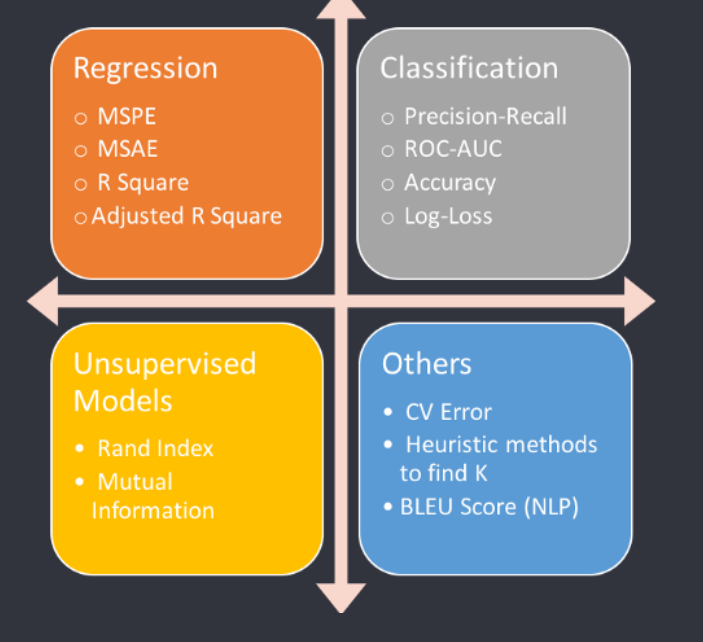

> - **Statistical Metrics:** Correlation
>> - 입력(Input): -무한대 ~ 무한대 범위의 연속형 값
>> - 출력(Output): 이론적으론 -1 ~ 1 범위의 연속형 값
> - **Regression Metrics:** MSE, MSPE, RMSE, RMSLE, MAE, MAPE, MPE, R^2, Adjusted R^&2, ... (Y의 범위가 무한대가 가능한 연속형일때)
>> - 입력(Input): -무한대 ~ 무한대 범위의 연속형 값
>> - 출력(Output): 이론적으론 0 ~ 무한대 범위의 연속형 값
> - **Classification Metrics:** Log Loss, Cross-entropy, ROC, AUC, Gini, Confusion Matrix, Accuracy, Precision, Recall, F1-score, Classification Report, KS Statistic, Concordant-Discordant Ratio ... (Y가 2개 또는 그 이상개수의 이산형일때)
>> - 입력(Input): -무한대 ~ 무한대 범위의 연속형 값
>> - 출력(Output): 알고리즘 종류에 따라 출력이 달라질 수 있음
>>> - 확률(Probability): 0 ~ 1 범위의 연속형 값 (Logistic Regression, Random Forest, Gradient Boosting, Adaboost, ...)
>>> - 집단(Class): 0 또는 1의 이산형 값 (SVM, KNN, ...)
> - **Ranking Metrics:** Gain, Lift, MRR, DCG, NDCG, ...
> - **Computer Vision Metrics:** PSNR, SSIM, IoU, ...
> - **NLP Metrics:** Perplexity, BLEU score, ...
> - **Deep Learning Related Metrics:** Inception score, Frechet Inception distance, ...
> - **Real Problem:** ???

> **2) 알고리즘비교 검증지표:** 어떤 알고리즘이 더 성능이 좋은지 평가하기 위한 기준   
> : 알고리즘 성능이 좋은것과 문제해결이 가능한 것은 다르기에, 알고리즘 검증지표는 없어도 되지만 문제해결 검증지표는 반드시 필요    
> : (이론적)알고리즘은 그저 특정 검증지표를 사용하여 만들어짐  
> - **Regression:** MSE
> - **Logistic Regression:** Log Loss
> - **Random Forest:** ???
> - **ARIMA:** ???
> - **CNN, RNN:** ???
> - **Example:** [Comparison of Algorithm Performance Metrics](https://pkg.robjhyndman.com/forecast/reference/accuracy.html)

- **예시:**

> - **Regression Metrics:** MSE, MSPE, RMSE, RMSLE, MAE, MAPE, MPE, R^2, Adjusted R^&2, ... (Y의 범위가 무한대가 가능한 연속형일때)

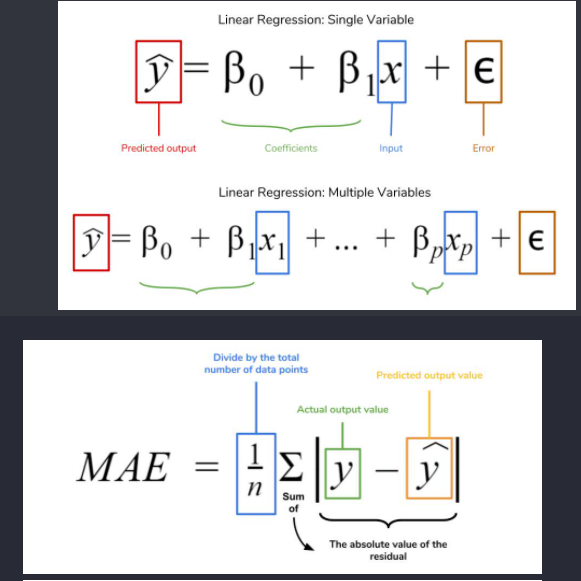

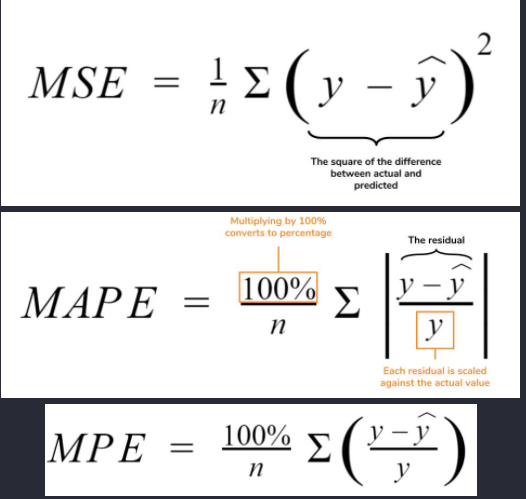

lassification Metrics:** Log Loss, Cross-entropy, ROC, AUC, Gini, Confusion Matrix, Accuracy, Precision, Recall, F1-score, Classification Report, KS Statistic, Concordant-Discordant Ratio ... (Y가 2개 또는 그 이상개수의 이산형일때)

### 잔차진단(Residual Diagnostics)

>**"백색잡음(White Noise)는 2가지의 속성을 만족해야 하며 하나라도 만족하지 못하면 모델이 개선의 여지가 있음을 의미합니다."**  

- **백색잡음(White Noise, $WN$):**   

image.png

>**1) 잔차들은 정규분포이고, (unbiased) 평균 0과 일정한 분산을 가져야 함:**  



    
>**2) 잔차들이 시간의 흐름에 따라 상관성이 없어야 함:**  
- 자기상관함수(Autocorrelation Fundtion([ACF](https://en.wikipedia.org/wiki/Autocorrelation)))를 통해 $Autocorrelation~=~0$인지 확인
    - 공분산(Covariance):
    <center>$Cov(\epsilon_s, \epsilon_k)$ = $E[(\epsilon_s-E(\epsilon_s))$$(\epsilon_k-E(\epsilon_k))]$ = $\gamma_{s,k}$</center>
    - 자기상관함수(Autocorrelation Function):
    <center>$Corr(\epsilon_s, \epsilon_k)$ = $\dfrac{Cov(\epsilon_s, \epsilon_k)}{\sqrt{Var(\epsilon_s)Var(\epsilon_k)}}$ = $\dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$</center>
    - 편자기상관함수(Partial Autocorrelation Function): $s$와 $k$사이의 상관성을 제거한 자기상관함수
    <center>$Corr[(\epsilon_s-\hat{\epsilon}_s, \epsilon_{s-t}-\hat{\epsilon}_{s-t})]$ for $1<t<k$</center>
            
            
- **회귀분석 가정과의 비교:**
    - 종속변수와 독립변수 간에 선형성의 관계를 가져야 함
    - 독립변수들 간에 서로 독립이어야 함
    - 잔차의 분포가 정규분포이어야 함
    - 잔차들이 서로 독립적으로 움직여야 함
    - 잔차들의 분산이 서로 같아야 함


- **자기상관 테스트 활용예시:**
    - Apply a portmanteau test to check the hypothesis that residuals are uncorrelated.

    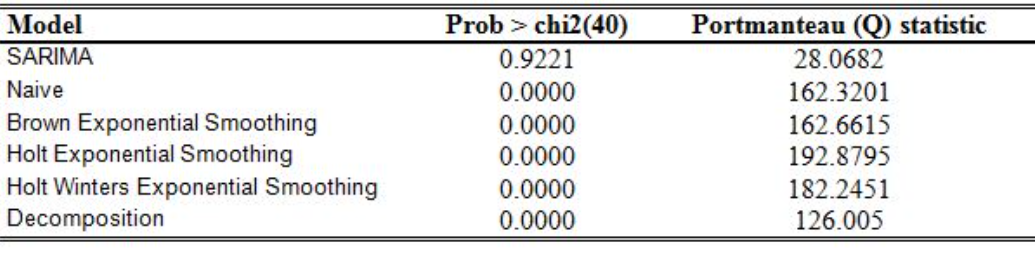

        - Plot the Autocorrelation function (ACF) and evaluate that at least 95% of the spikes are on the interval.

        image.png

> **예측 정확성이 높은 시간영역을 선택**

image.png


# (시계열) 회귀분석 요약

> **"$t$개의 값을 가지는 $k$차원 독립변수 $X_i$와 이에 대응하는 종속변수 $Y$간의 관계를 정량적으로 찾는 알고리즘"**


## 모델링  

- **알고리즘:** 독립 변수나 종속 변수가 반드시 대칭 분포를 보여야 한다는 가정은 없지만 정규 분포에 가까운 분포를 보일 수록 선형회귀모형의 성능이 좋아지는 경우가 많음  

<center>
$Y \approx \hat{Y} = f(X_1, X_2, ..., X_k) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_kX_k \\
= [\beta_0~\beta_1~\beta_2~\cdots~\beta_k]\begin{bmatrix} 1 \\ X_1 \\ X_2 \\ \vdots \\ X_k \end{bmatrix}
= [1~X_1~X_2~\cdots~X_k]\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_k \end{bmatrix}
= \begin{bmatrix} 1~X_{11}~X_{21}~\cdots~X_{k1} \\ 1~X_{12}~X_{22}~\cdots~X_{k2} \\ \vdots \\ 1~X_{1t}~X_{2t}~\cdots~X_{kt} \end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_k \end{bmatrix} = X\beta$
</center>

- **비선형변수 효과:** 로그 또는 제곱근 등의 변환된 변수 사용시 회귀분석 성능 향상 가능
    - 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우
    - 독립 변수와 종속 변수간의 관계가 곱셈 혹은 나눗셉으로 연결된 경우
    - 종속 변수와 예측치가 비선형 관계를 보이는 경우

## 잔차진단(Residual Diagnostics)

- **회귀분석 가정 내:**
    - 종속변수와 독립변수 간에 선형성의 관계를 가져야 함
    - 독립변수들 간에 서로 독립이어야 함
    - 잔차의 분포가 정규분포이어야 함
    - 잔차들이 서로 독립적으로 움직여야 함
    - 잔차들의 분산이 서로 같아야 함
    
    
- **시계열 회귀분석 잔차진단 차이 적용:**
    - 정상성 테스트: 잔차가 백색잡음의 형태인지
    - 정규분포 테스트: 잔차가 정규분포의 형태인지
    - 자기상관 테스트: 잔차가 서로 시간흐름에서 독립적인지
    - 등분산성 테스트: 잔차가 분산이 일정한지

## 시계열 분석 주 사용 패키지

###  "statsmodels"

> **R-style 모형 기술을 가능하게 하는 patsy 패키지를 포함하고 있어 R에서만 가능했던 회귀 분석 / 시계열 분석을 그대로 파이썬에서 이용가능**
- 검정 및 추정(test and estimation)
- 회귀 분석(regression analysis)
- 시계열 분석(time-series analysis)

~~~
get_rdataset(item, [package="datasets"])
~~~

- **statsmodels 데이터셋 예시:**  

~~~
#대기중 CO2농도 데이터
data = sm.datasets.get_rdataset("CO2", package="datasets")
#황체형성 호르몬(Luteinizing Hormone)의 수치를 나타내는 시계열 데이터
data = sm.datasets.get_rdataset("lh")
#1974-1979년 사이의 영국의 호흡기 질환 사망자 수를 나타내는 시계열 데이터
data = sm.datasets.get_rdataset("deaths", "MASS")
#1949-1960년 사이의 국제 항공 운송인원을 나타내는 시계열 데이터
data = sm.datasets.get_rdataset("AirPassengers")
#미국의 강수량 데이터
data = sm.datasets.get_rdataset("precip")
#타이타닉호의 탑승자들에 대한 데이터
data = sm.datasets.get_rdataset("Titanic", package="datasets")
~~~  


- **Output:**
    - package: 데이터를 제공하는 R 패키지 이름
    - title: 데이터 이름
    - data: 데이터를 담고 있는 데이터프레임
    - __doc__: 데이터에 대한 설명 문자열(R 패키지의 내용 기준)

### "sklearn"(scikit-learn)

> - 벤치마크용 데이터셋 예제
- 데이터 전처리(preprocessing)
- 지도 학습(Supervised learning)
- 비지도 학습(Unsupervised learning)
- 모형 평가 및 선택(evaluation and selection)


- **sklearn 데이터셋 예시:**

    1) scikit-learn 설치 패키지에 같이 포함된 소량의 데이터(load 계열 명령)
    
~~~
- load_boston: 회귀 분석용 보스턴 집값
- load_diabetes: 회귀 분석용 당뇨병 자료
- load_linnerud: 회귀 분석용 linnerud 자료
- load_iris: 분류용 붓꽃(iris) 자료
- load_digits: 분류용 숫자(digit) 필기 이미지 자료
- load_wine: 분류용 포도주(wine) 등급 자료
- load_breast_cancer: 분류용 유방암(breast cancer) 진단 자료
~~~

    2) 인터넷에서 다운로드할 수 있는 대량의 데이터(fetch 계열 명령)

~~~
- fetch_california_housing: : 회귀분석용 캘리포니아 집값 자료
- fetch_covtype : 회귀분석용 토지 조사 자료
- fetch_20newsgroups : 뉴스 그룹 텍스트 자료
- fetch_olivetti_faces : 얼굴 이미지 자료
- fetch_lfw_people : 유명인 얼굴 이미지 자료
- fetch_lfw_pairs : 유명인 얼굴 이미지 자료
- fetch_rcv1 : 로이터 뉴스 말뭉치
- fetch_kddcup99 : Kddcup 99 Tcp dump 자료
~~~

    3) 확률분포를 사용하여 가상의 데이터를 생성(make 계열 명령)

~~~
- make_regression: 회귀 분석용 가상 데이터 생성
- make_classification: 분류용 가상 데이터 생성
- make_blobs: 클러스터링용 가상 데이터 생성
~~~

- **Output:** Bunch 라는 클래스 객체 형식으로 생성, 이 클래스 객체는 다음과 같은 속성을 가짐.
    - data: (필수) 독립 변수 ndarray 배열
    - target: (필수) 종속 변수 ndarray 배열
    - feature_names: (옵션) 독립 변수 이름 리스트
    - target_names: (옵션) 종속 변수 이름 리스트
    - DESCR: (옵션) 자료에 대한 설명


###데이터 전처리 방향

 - 시간혈실 반영
  - '미래의 시간패턴을 미리 반영하는 건 비현실적, 이는 과적합(overfitting)을 유발'

### [정상성(Stationarity Process)](https://en.wikipedia.org/wiki/Stationary_process)

- **시계열이 정상성이다:** 시간의 흐름에 따라 "통계적 특성(Statistical Properties)"이 변하지 않음
    - **통계적 특성(Statistical Properties):** 주로 평균(Mean)과 분산(Variance)/공분산(Covariance)를 얘기하지만 이를 포함한 모든 분포적 특성을 총칭함
    - **[Homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)**: 일정한(유한한, 발산하지않는) 분산을 가짐을 의미 $\leftrightarrow$ **[Heteroscedasticity](https://en.wikipedia.org/wiki/Heteroscedasticity)**: 발산하는 분산을 가짐을 의미


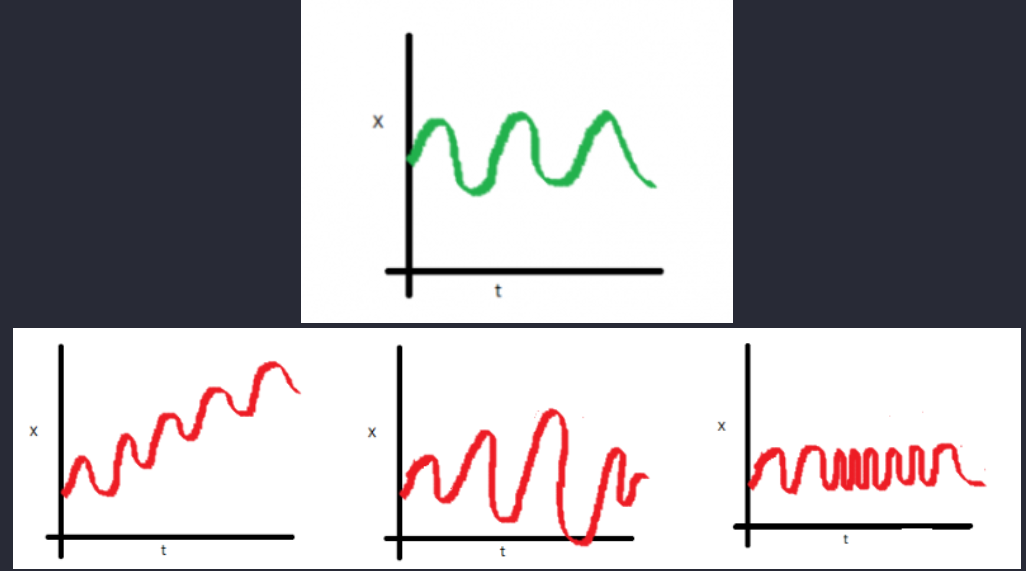

# 시계열 알고리즘

image.png

## 비정상성(Non-stationary)의 정상성(Stationary) 변환

> - **목적: 정상성 확보를 통해 안정성이 높아지고 예측력 향상**
> - **장점: 절약성 원칙(Principle of Parsimony)에 따라 적은 모수만으로 모델링 가능하기에 과적합 확률이 줄어듬**
> - **방법: 제곱, 루트, 로그, 차분 등**

    
- **이론예시:**

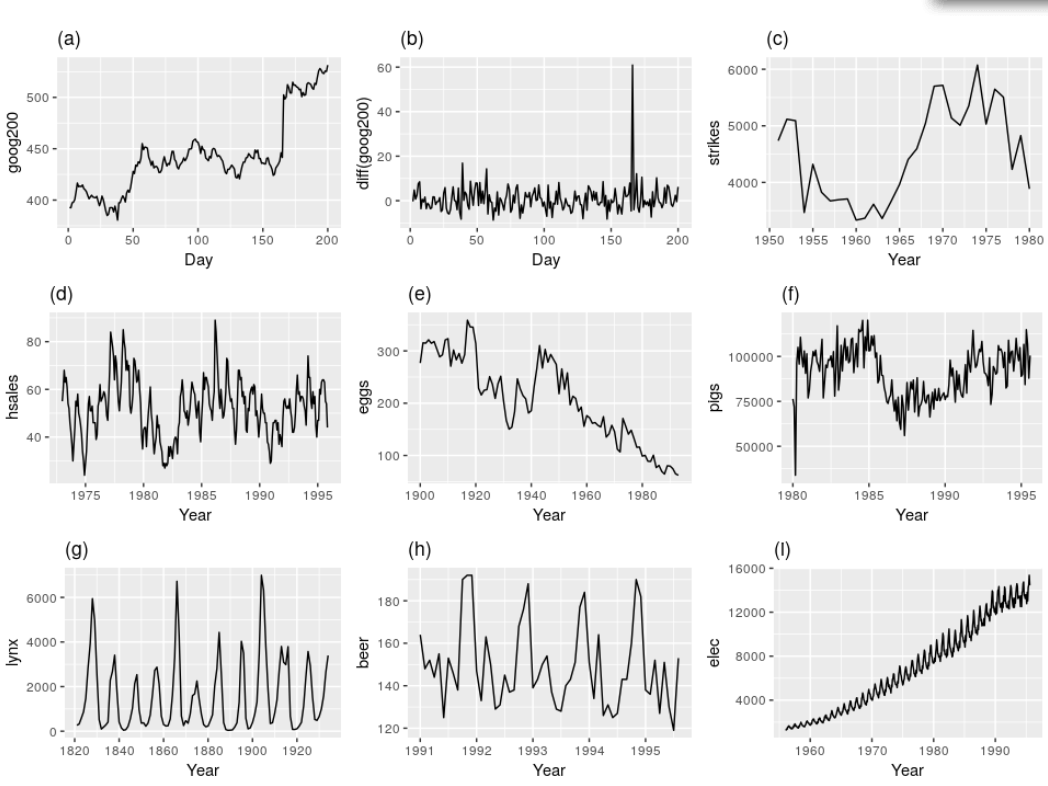

    - Trend: a/c/e/f/i  
    - Seasonality: d/h/i  
    - Cycle: g
    - Non-constant Variance: i  

**1) 로그변환(Logarithm Transform):**
> - 시간흐름에 비례하여 값이 커지는 경우(분산 증가)
> - 비정상 확률 과정으로 표준편차가 자료의 크기에 비례하여 증가하거나 지수함수적으로 증가하는 경우
> - 로그 변환한 확률 과정의 분산은 일정하기에 추세 제거로 기댓값이 0이 되면 정상 과정으로 모형화 가능


**2) 차분(Difference):** 특정 시점 또는 시점들의 데이터가 발산할 경우 시점간 차분(변화량)으로 정상성 변환 가능
- **계절성(Seasonality, $S_t$)**: 특정한 달/요일에 따라 기대값이 달라지는 것, 변수 더미화를 통해 추정 가능
> - **계절성 제거: 1) 계절성 추정($f(t)$) 후 계절성 제거를 통한 정상성 확보 (수학적 이해)**
    - 확률과정의 계절변수 더미화를 통해 기댓값 함수를 알아내는 것
    - 확률과정($Y_t$)이 추정이 가능한 결정론적 계절성함수($f(t)$)와 정상확률과정($Y^s_t$)의 합
    

> - **계절성 제거: 2) 차분 적용 $(1-L^d) Y_t$ 후 계절성 제거를 통한 정상성 확보 (수학적 이해)**




- **추세(Trend, $T_t$)**: 시계열이 시간에 따라 증가, 감소 또는 일정 수준을 유지하는 경우  
> - **추세 제거: 1) 추세 추정($f(t)$) 후 추세 제거를 통한 정상성 확보 (수학적 이해)**
    - 확률과정의 결정론적 기댓값 함수를 알아내는 것
    - 확률과정($Y_t$)이 추정이 가능한 결정론적 추세함수($f(t)$)와 정상확률과정($Y^s_t$)의 합
    

> - **추세 제거: 2) 차분 적용 $(1-L^1)^d Y_t$ 후 추세 제거를 통한 정상성 확보 (수학적 이해)**

**3) Box-Cox 변환:** 정규분포가 아닌 자료를 정규분포로 변환하기 위해 사용
> - 모수(parameter) $\lambda$를 가지며, 보통 여러가지 $\lambda$ 값을 시도하여 가장 정규성을 높여주는 값을 사용

### 정상성 테스트 방향

> **추세와 계절성 모두 제거된 정상성 데이터 변환 필요!**
>> - **ADF 정상성 확인 -> 추세 제거 확인 Measure**  
: ADF 검정통계량은 정상이라고 해도 데이터에 계절성이 포함되면 ACF의 비정상 Lag 존재하는 비정상데이터 가능  

>> - **KPSS 정상성 확인 -> 계절성 제거 확인 Measure**  
: KPSS 검정통계량은 정상이라고 해도 데이터에 추세가 포함되면 ACF의 비정상 Lag 존재하는 비정상데이터 가능  


## 일반 선형확률과정(General Linear Process)

> **"시계열 데이터가 가우시안 백색잡음의 현재값과 과거값의 선형조합"**  

\begin{align*}
Y_t = \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\psi_i^2 < \infty
\end{align*}

- **세부 알고리즘:**
    - WN(White Noise)
    - MA(Moving Average)
    - AR(Auto-Regressive)
    - ARMA(Auto-Regressive Moving Average)
    - ARIMA(Auto-Regressive Integrated Moving Average)
    - SARIMA(Seasonal ARIMA)

### WN(White Noise)

image.png

>**1) 잔차들은 정규분포이고, (unbiased) 평균 0과 일정한 분산을 가져야 함:**  
\begin{align*}
\{\epsilon_t : t = \dots, -2, -1, 0, 1, 2, \dots\} \sim N(0,\sigma^2_{\epsilon_t}) \\
\end{align*}
\begin{align*}
where~~ \epsilon_t \sim  i.i.d(independent~and~identically~distributed) \\
\end{align*}
\begin{align*}
\epsilon_t = Y_t - \hat{Y_t}, \;\; E(\epsilon_t) = 0, \;\; Var(\epsilon_t) = \sigma^2_{\epsilon_t} \\
\end{align*}
\begin{align*}
Cov(\epsilon_s, \epsilon_k) = 0~for~different~times!(s \ne k)
\end{align*}
    
>**2) 잔차들이 시간의 흐름에 따라 상관성이 없어야 함:**  
- 자기상관함수(Autocorrelation Fundtion([ACF](https://en.wikipedia.org/wiki/Autocorrelation)))를 통해 $Autocorrelation~=~0$인지 확인
    - 공분산(Covariance):
    <center>$Cov(Y_s, Y_k)$ = $E[(Y_s-E(Y_s))$$(Y_k-E(Y_k))]$ = $\gamma_{s,k}$</center>
    - 자기상관함수(Autocorrelation Function):
    <center>$Corr(Y_s, Y_k)$ = $\dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}}$ = $\dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$</center>
    - 편자기상관함수(Partial Autocorrelation Function): $s$와 $k$사이의 상관성을 제거한 자기상관함수
    <center>$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})]$ for $1<t<k$</center>

- **특성요약:**
    - 강정상 과정(Stictly Stationary Process)
    - 강정상 예시로 시계열분석 기본알고리즘 중 가장 중요함
    - 시차(lag)가 0일 경우, 자기공분산은 확률 분포의 분산이 되고 시차가 0이 아닌 경우, 자기공분산은 0.  
    \begin{align*}
    \gamma_i = \begin{cases} \text{Var}(\epsilon_t) & \;\; \text{ for } i = 0 \\  
    0 & \;\; \text{ for }  i \neq 0 \end{cases}
    \end{align*}
    - 시차(lag)가 0일 경우, 자기상관계수는 1이 되고 시차가 0이 아닌 경우, 자기상관계수는 0.
    \begin{align*}
    \rho_i = \begin{cases} 1 & \;\; \text{ for } i = 0 \\  
    0 & \;\; \text{ for }  i \neq 0 \end{cases}
    \end{align*}

### MA(Moving Average)

- 2개 이상의 연속된 데이터 값의 평균을 연속적으로 계산해내는 평균화 방법.

- 통계에서 이동 평균은 전체 데이터 집합의 여러 하위 집합에 대한 일련의 평균을 만들어 데이터 요소를 분석하는데 사용되는 계산.

- 금융에서 이동 평균(MA)은 기술 분석에 일반적으로 사용되는 주식지표.

- 각 시점의 데이터가 최근 과거 값에 대한 '오차'항으로 구성된 함수로 표현된 과정에 의존함. 이때 오차항은 서로 독립적

> **"$MA(q)$: 알고리즘의 차수($q$)가 유한한 가우시안 백색잡음과정의 선형조합"**
- Exponential Smoothing 내  Moving Average Smoothing은 과거의 Trend-Cycle을 추정하기 위함이고, MA는 미래 값을 예측하기 위함

\begin{align*}
Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q}
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty
\end{align*}
\begin{align*}
Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} \\
&= \epsilon_t + \theta_1L\epsilon_t + \theta_2L^2\epsilon_t + \cdots + \theta_qL^q\epsilon_t \\
&= (1 + \theta_1L + \theta_2L^2 + \cdots + \theta_qL^q)\epsilon_t \\
&= \theta(L)\epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_{t-1} = L\epsilon_t~and~\epsilon_{t-2} = L^2\epsilon_t$
\end{align*}

- **MA(1):**  
\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1})^2] \\
&& &= E(\epsilon_t^2) + 2\theta_1E(\epsilon_{t}\epsilon_{t-1}) + \theta_1^2E(\epsilon_{t-1}^2) \\
&& &= \sigma_{\epsilon_i}^2 + 2 \theta_1 \cdot 0 + \theta_1^2 \sigma_{\epsilon_i}^2 \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-1}) + \theta_1 E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_{t-1}^2) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-2}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \sigma_{\epsilon_{i}}^2 + \theta_1^2 \cdot 0 \\
&& &= \theta_1 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_t \epsilon_{t-3}) + \theta_1 E (\epsilon_{t-1} \epsilon_{t-2}) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-3}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \cdot 0 + \theta_1^2 \cdot 0 \\
&& &= 0 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1}{1+\theta_1^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 1 \\
\end{align*}

- **MA(2):**  
\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) + \theta_2E(\epsilon_{t-2}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2})^2] \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 + \theta_2^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2} + \theta_2\epsilon_{t-3}) \right] \\
&& &= (\theta_1 + \theta_1\theta_2) \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3} + \theta_2\epsilon_{t-4}) \right] \\
&& &= \theta_2 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-i}) = \gamma_i &= 0~~for~~i > 2 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-2}) = \rho_2 &= \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 2 \\
\end{align*}

- **MA(q):**  
\begin{align*}
\text{Autocorrelation} && Corr(Y_t, Y_{t-i}) = \rho_i &=
\begin{cases}
\dfrac{\theta_i + \theta_1\theta_{i-1}  + \theta_2\theta_{i-2} + \cdots + \theta_q\theta_{i-q}}{1 + \theta_1^2 + \cdots  + \theta_q^2} & \text{ for } i= 1, 2, \cdots, q \\
0 & \text{ for } i > q \\
\end{cases}
\end{align*}

> **움직임 특성:**
- **Stationarity Condition of MA(1):** $|\theta_1| < 1$
- **Stationarity Condition of MA(2):** $|\theta_2| < 1$, $\theta_1 + \theta_2 > -1$, $\theta_1 - \theta_2 < 1$

- 평균은 동일 시점에서 단순 평균이 많이 사용됨. 하지만 시간지표가 다를 경우 최근의 정보가 더 많은 영향력을 미칠 수 있기 때문에 최근에 단순 평균보다 최근 정보에 가중치를 더 주는 방법을 사용할 수도 있다.

- 단순 이동 평균(Simple Moving Average)
- 가중 이동 평균(Weighted Moving Average)
- 지수 이동 평균(Exponential Moving Average) 방법이 존재.

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
### MA(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.9])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

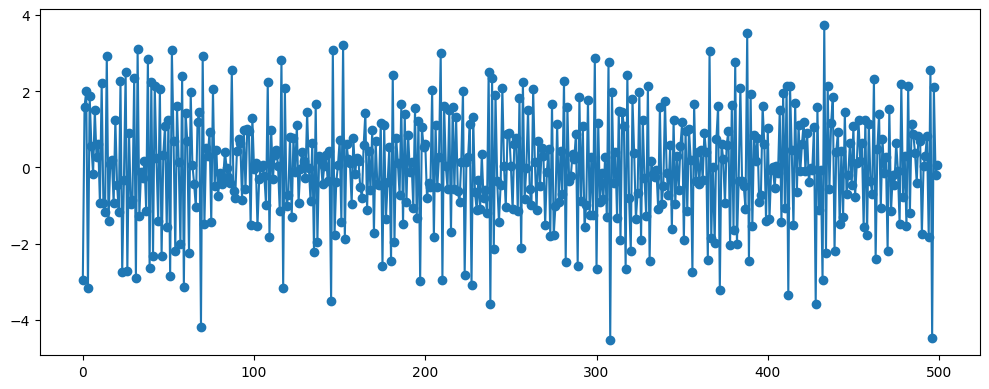

In [ ]:
### MA(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 0.6])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

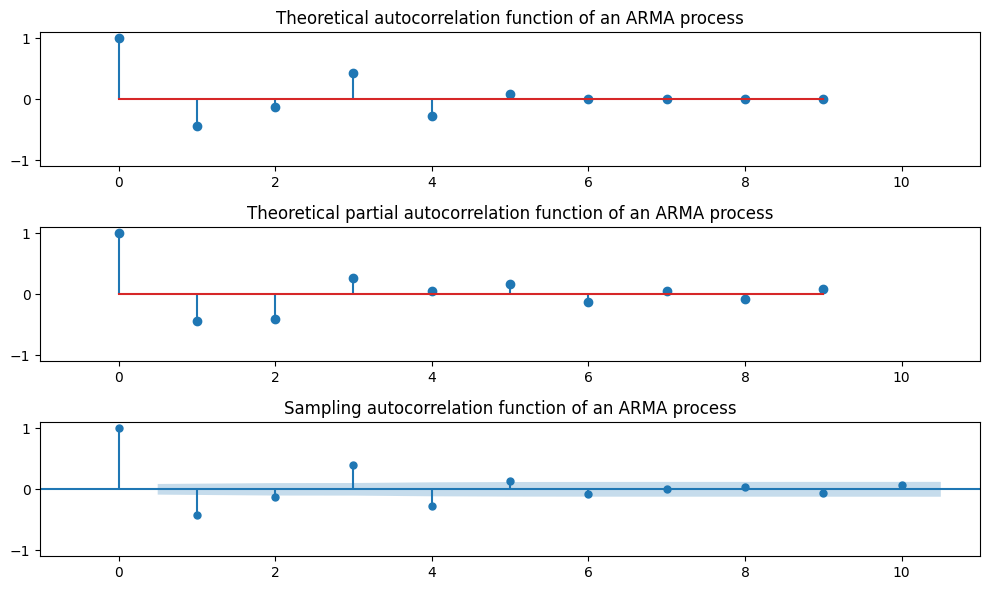

In [ ]:
### MA(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 1.6, 0.9, -1.5, 0.7])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

### AR(Auto-Regressive)

- 다중 회귀 모델 : 목표 예상 변수(forecast variable)의 선형조합을 이용하여 관심 있는 변수를 예측

- 자기 회귀 모델 : 변수의 과거값의 선형 조합을 이용하여 관심 있는 변수를 예측, 자기 자신에 대한 변수의 회귀라는 의미.


> **"$AR(p)$: 알고리즘의 차수($p$)가 유한한 자기자신의 과거값들의 선형조합"**
- **필요성:** ACF가 시차(Lag)가 증가해도 0이 되지 않고 오랜시간 남아있는 경우에 $MA$모형을 사용하면 차수가 $\infty$로 감

\begin{align*}
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty
\end{align*}
\begin{align*}
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t \\
Y_t - \phi_1Y_{t-1} - \phi_2Y_{t-2} - \cdots - \phi_pY_{t-p} &= \epsilon_t \\
Y_t - \phi_1LY_t - \phi_2L^2Y_t - \cdots - \phi_pL^pY_t &= \epsilon_t \\
(1 - \phi_1L - \phi_2L^2 - \cdots - \phi_pL^p)Y_t &= \epsilon_t \\
\phi(L)Y_t &= \epsilon_t \\
\end{align*}
\begin{align*}
where~Y_{t-1} = LY_t~and~Y_{t-2} = L^2Y_t
\end{align*}

- **AR(1):**  
\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^2  (\phi_1 Y_{t-3} + \epsilon_{t-2}) + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^3 Y_{t-3} + \phi_1^2 \epsilon_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} +\phi_1^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\end{align*}

> **움직임 특성:**
- $\phi_1 = 0$: $Y_t$는 백색잡음  
- $\phi_1 < 0$: 부호를 바꿔가면서(진동하면서) 지수적으로 감소  
- $\phi_1 > 0$: 시차가 증가하면서 자기상관계수는 지수적으로 감소  
- $\phi_1 = 1$: $Y_t$는 비정상성인 랜덤워크(Random Walk)
\begin{align*}
Y_t &= Y_{t-1} + \epsilon_t \\
Var(Y_t) &= Var(Y_{t-1} + \epsilon_t) \\
&= Var(Y_{t-1}) + Var(\epsilon_t)  \;\; (\text{independence}) \\
Var(Y_t) &> Var(Y_{t-1})
\end{align*}
- **Stationarity Condition:** $|\phi_1| < 1$

- **AR(2):**  
\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \phi_2 (\phi_2 Y_{t-3} + \epsilon_{t-2}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \phi_2^2 Y_{t-3} + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& &= \phi_1^2 (\phi_1 Y_{t-3} + \phi_2 Y_{t-4} + \epsilon_{t-3}) + \phi_1 \epsilon_{t-1} +
\phi_2^2 (\phi_1 Y_{t-4} + \phi_2 Y_{t-5} + \epsilon_{t-4}) + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-1} + \phi_1^2 \epsilon_{t-2} + \phi_2^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \phi_2^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\end{align*}

> **움직임 특성:**
- 시차가 증가하면서 자기상관계수의 절대값은 지수적으로 감소  
- 진동 주파수에 따라 다르지만 진동 가능
- **Stationarity Condition:** $|\phi_1| < 1$, $\phi_1 + \phi_2 < 1$, $\phi_2 - \phi_1 < 1$

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

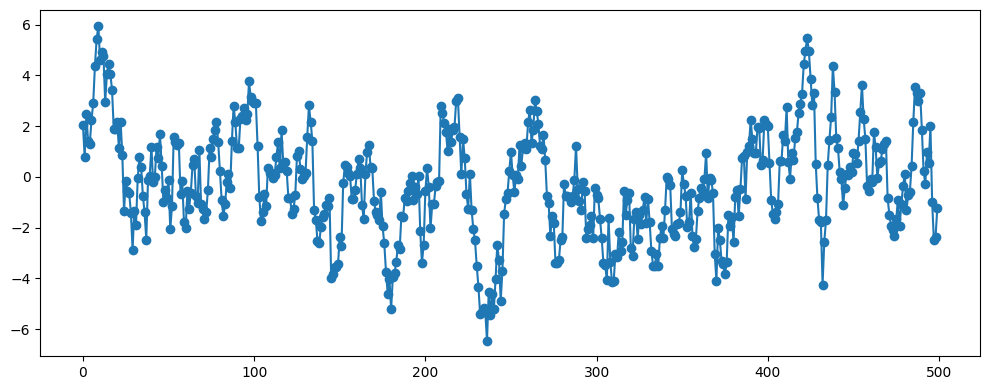

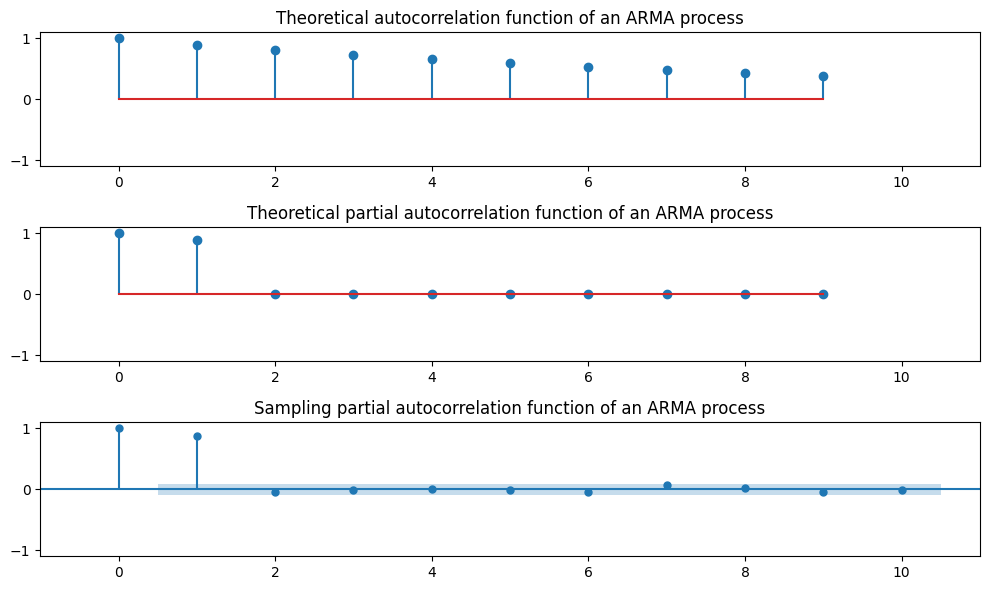

In [ ]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

#데이터가 AR 모델에 적합한지 평가 ->PACF로 평가
plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

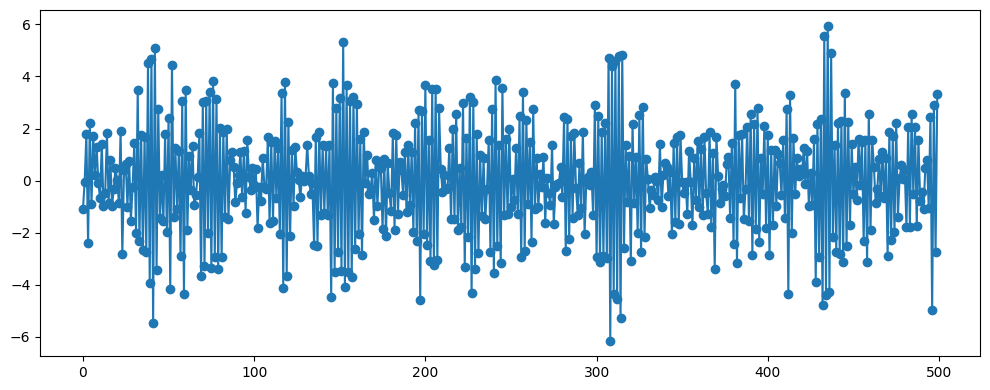

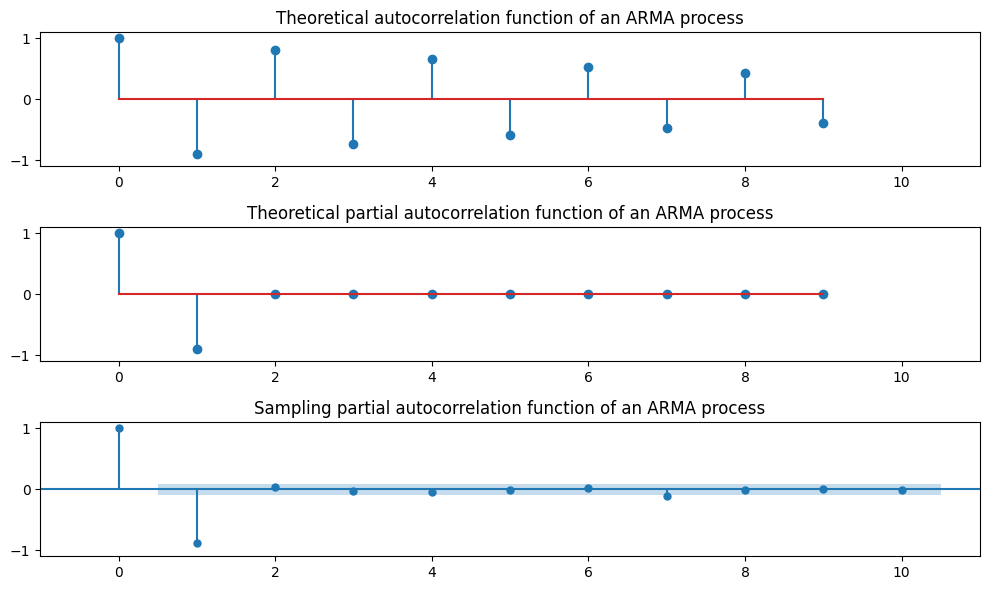

In [ ]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

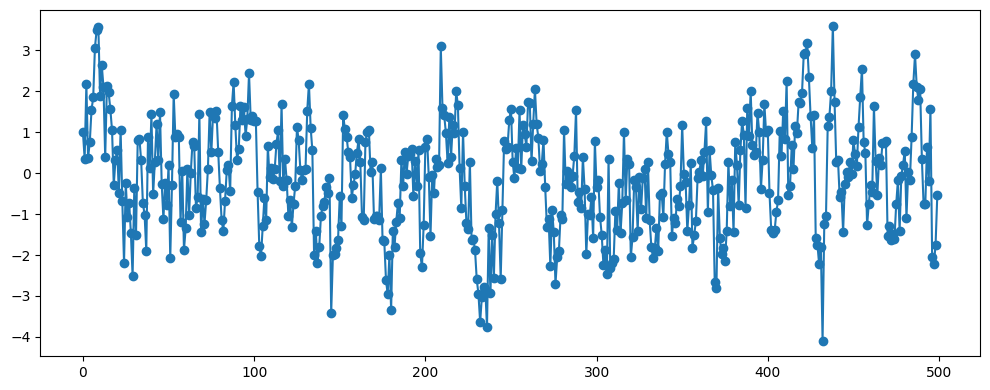

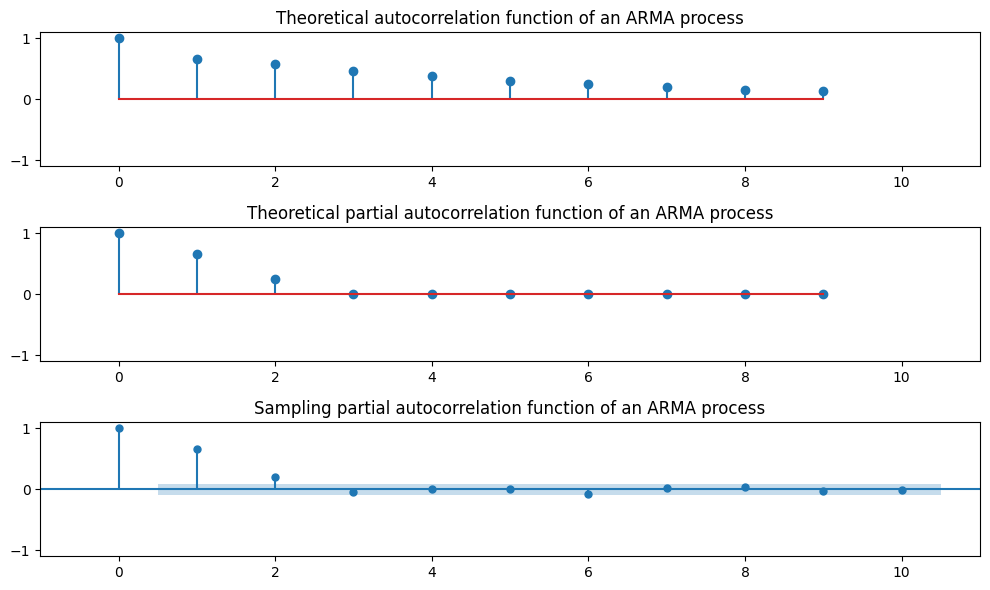

In [ ]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

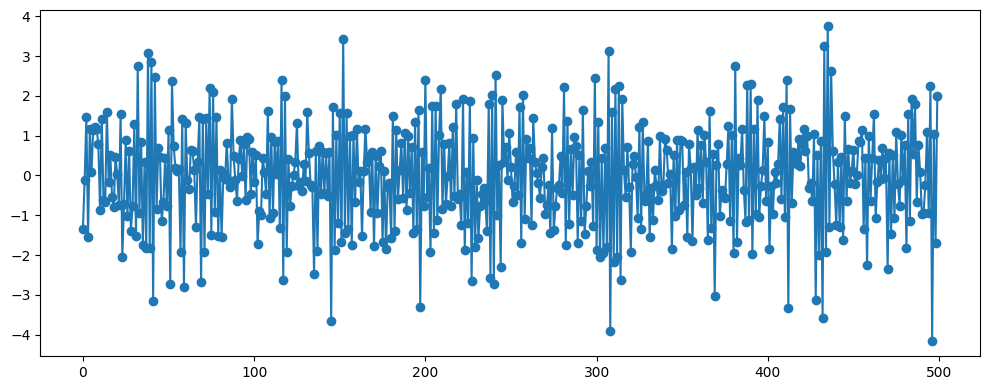

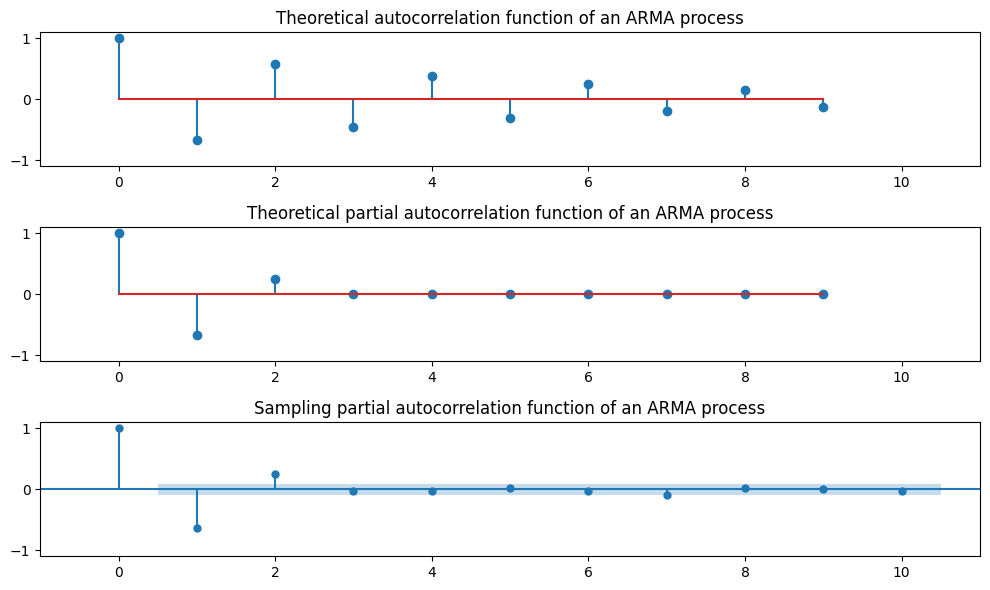

In [ ]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

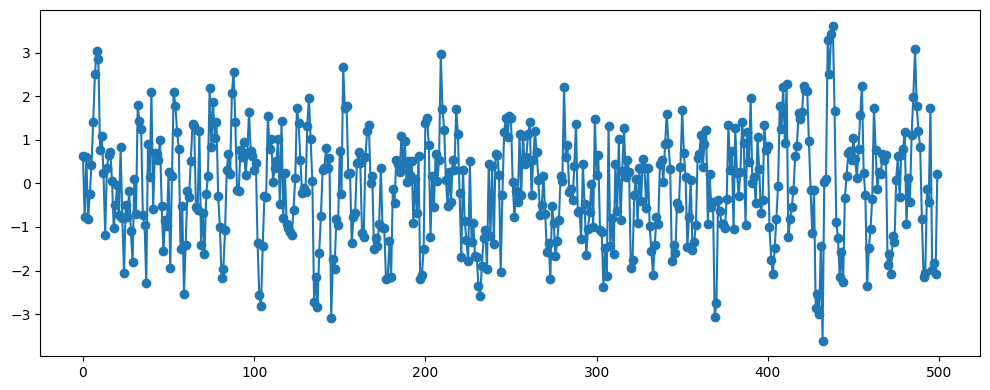

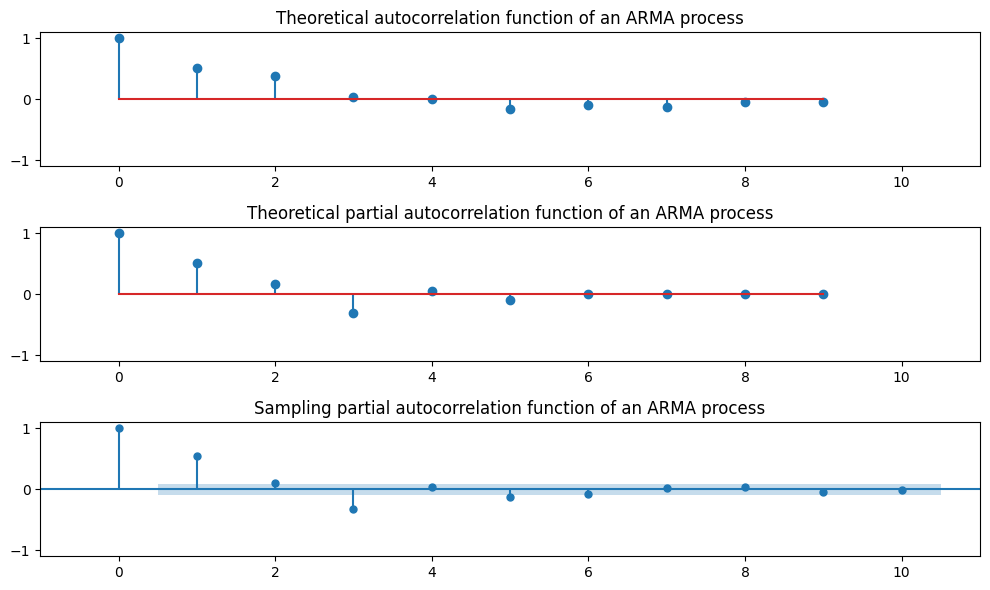

In [ ]:
### AR(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25, -0.3, 0.1, -0.1])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

### 강한 정상성 VS 약한 정상성

- 약한 정상성 : 과정의 평균과 분산이 시간에 따라 변하지 않아야 함.
- 강한 정상성 : 과정에서 출력된 무작위 변수들의 분포가 시간이 지나더라도 동일하게 유지되는 것을 요구.

강한 정상성이 약한 정상성을 포괄하는 것 처럼 생각될 수 있지만 항상 그렇지만 않음

ex) 코시 분포-> 평균이 정의되어 있지 않아 / 약한 정상성은 되지만, 강한 정상성은 되지 않음.

### Relation of MA and AR

- **가역성 조건(Invertibility Condition):**

> **1)** $MA(q)$ -> $AR(\infty)$: 변환 후 AR 모형이 Stationary Condition이면 "Invertibility"  
> **2)** $AR(p)$ -> $MA(\infty)$: 여러개 모형변환 가능하지만 "Invertibility" 조건을 만족하는 MA 모형은 단 1개만 존재

### ARMA(Auto-Regressive Moving Average)

> **"$ARMA(p,q)$: 알고리즘의 차수($p~and~q$)가 유한한 $AR(p)$와 $MA(q)$의 선형조합"**  
> - $AR$과 $MA$의 정상성 조건과 가역성 조건이 동일하게 $ARMA$ 알고리즘들에 적용  
> - 종속변수 $Y_t$는 종속변수 $Y_t$와 백색잡음($\epsilon_t$) 차분들(Lagged Variables)의 합으로 예측가능  

\begin{align*}
Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} +
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty, \displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty
\end{align*}
\begin{align*}
\phi(L)Y_t &= \theta(L)\epsilon_t \\
Y_t &= \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
\end{align*}

\begin{align*}
\text{Main Equation} && Y_t &= \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
&& &= \psi(L)\epsilon_t \text{ where } \psi(L) = \dfrac{\theta(L)}{\phi(L)} \\
&& &= (1 + \psi_1L + \psi_2L^2 + \cdots)\epsilon_t \\
&& &= \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots \\
&& & \text{ where } \\
&& \psi_1 &= \theta_1 - \phi_1 \\
&& \psi_2 &= \theta_2 - \phi_2 - \phi_1 \psi_1 \\
&& & \vdots \\
&& \psi_j &= \theta_j - \phi_p\psi_{j-p} - \phi_2 \psi_{p-1} - \cdots - \phi_1 \psi_{j-1} \\
\text{Autocorrelation("Yule-Walker Equation")} && \rho_i &= \phi_1 \rho_{i-1} + \cdots + \phi_p \rho_{i-p} \\
\end{align*}

### 모형 차수결정 정리

> **1) 추정 및 예측을 하기 전에 파라미터에 따라 모형이 어떠한 결과를 도출할지 이해(예상) 필요**  
> **2) 결과이해(예상)는 기계의 실수를 방지하고 결과의 확신을 증가시킴**  

- **$p$, $q$ 파라미터 추론(by ACF and PACF):**  
1) 정상성 형태 변환: 차분/로그변환/계절성제거 등을 통해 데이터를 정상성 형태로 변환  
2) $ACF$, $PACF$를 도식화 하여 ARMA의 파라미터 차수를 추론  

| - | 자기회귀: $AR(p)$ | 이동평균: $MA(q)$ | 자기회귀이동평균: $ARMA(p,q)$ |
|----------------------|-------------------------------------------|-------------------------------------------|--------------------------------------------------------------|
| $ACF$ | 지수적 감소, 진동하는 사인 형태 | $q+1$ 차항부터 절단모양(0수렴) | $q+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |
| $PACF$ | $p+1$ 차항부터 절단모양(0수렴) | 지수적 감소, 진동하는 사인 형태 | $p+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |

## 시계열을 가장 잘 설명하는 모델의 결정



| 그래프의 종류 | AR(p) | MA(q) | ARMA |
|-------------------|-------------------|-------------------|-------------------|
| ACF 행동 | 천천히 감소 | 지연 q 이후 빠르게 감소 | 가파른 절단 없음 |
| PACF 행동 | 지연 q 이후 빠르게 감소 | 천천히 감소 | 가파른 절단 없음 |



- ARIMA는  ARMA에 없는 누적(intergrated)이라는 용어만 추가됨.

**차분의 차수가 너무 크지 않아야 함**


### ARIMA(Auto-Regressive Integrated Moving Average)

- AR(Autoregression) 모형과 MA(Moving Average)모형을 합친 모델

- 이 모델의 가정 : 시계열 데이터의 정상성(Stationary)

> **"$ARIMA(p,d,q)$: 1이상의 차분이 적용된 $\Delta^d Y_t = (1-L)^d Y_{t}$가 알고리즘의 차수($p~and~q$)가 유한한 $AR(p)$와 $MA(q)$의 선형조합"**  
> - 비정상성인 시계열 데이터 $Y_t$를 차분한 결과로 만들어진 $\Delta Y_t = Y_t - Y_{t-1} = (1-L) Y_{t}$가 정상성인 데이터이고 ARMA 모형을 따르면 원래의 $Y_t$를 **ARIMA 모형**이라고 함  
**=> $d \geq 1$:** $Y_t$는 비정상성 시계열 데이터이다(단위근을 갖는다)  
> - $d$번 차분한 후 시계열 $\Delta^d Y_t$가 정상성인 데이터이고 ARMA(p,q) 모형을 따른다면 적분차수(Order of Integrarion)가 $d$인 **ARIMA(p,d,q)**로 표기함  
    - $p=0$: ARIMA(0,d,q) = IMA(d,q)
    - $q=0$: ARIMA(p,d,0) = ARI(p,d)  

| Parameters | Description |
|-----|----------------------------------|
| $p$ | order of the autoregressive part |
| $d$ | degree of differencing involved |
| $q$ | order of the moving average part |


- **ARIMA(0,1,1) = IMA(1,1)**
> **"자기상관계수(ACF)가 빠르게 감소하지 않는 것이 ARIMA와 같은 적분과정(Integrated Process)의 특징"**
> - 차분을 해야 정상성이 되는 $Y_t$이기에, 시차(Lag)가 증가해도 ACF가 1에 가까운 상관성을 유지하려 하기에 쉽게 감소하지 않음

\begin{align*}
Y_t &= Y_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1} \\
Y_t &= \epsilon_t+(1+\theta)\epsilon_{t-1}+(1+\theta)\epsilon_{t-2}+(1+\theta)\epsilon_{t-3}+\cdots \\
Corr(Y_t, Y_{t-1}) &= \rho_i \approx 1
\end{align*}


- **ARIMA(0,2,1) = IMA(2,1)**

\begin{align*}
\Delta^2 Y_t = (1-L)^2 Y_{t} = \epsilon_t + \theta_1 \epsilon_{t-1}\\
\end{align*}

**차분** : 시계열 값을 시간에 따른 값의 변화로 바꾸는 것을 의미.

### ARIMA 모형 차수결정 정리

> **1) 추정 및 예측을 하기 전에 파라미터에 따라 모형이 어떠한 결과를 도출할지 이해(예상) 필요**  
> **2) 결과이해(예상)는 기계의 실수를 방지하고 결과의 확신을 증가시킴**  

- **$p$, $q$ 파라미터 추론(by ACF and PACF):**  
1) 정상성 형태 변환: 차분/로그변환/계절성제거 등을 통해 데이터를 정상성 형태로 변환  
2) $ACF$, $PACF$를 도식화 하여 ARMA의 파라미터 차수를 추론  

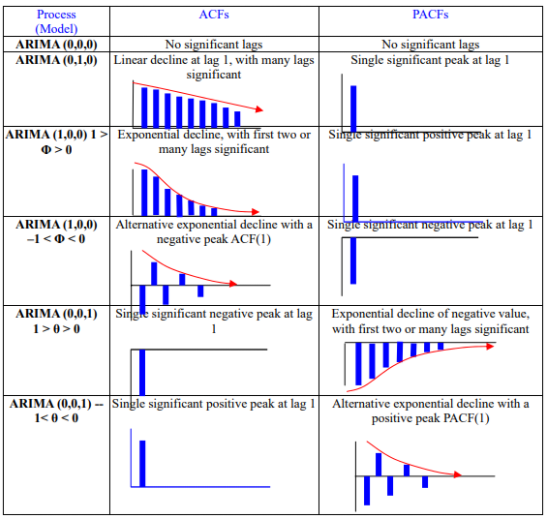

- **$c$, $d$ 파라미터 이해: X가 반영되지 않고 추정된 시계열 알고리즘은 결국 상수항의 적합성을 높이는 것!**

> **"상수항(Const)인 $c$는 이론수식 복잡성으로 생략되기도 하나 존재가능"**  
> **"높은 차수의 차분($d$)은 예측 구간추정 범위를 급격하게 상승시킴"**   
> - $c = 0, d = 0$: 점추정은 0, 예측의 구간추정은 과거데이터의 표준편차
> - $c \neq 0, d = 0$: 점추정은 과거데이터의 평균, 예측의 구간추정은 과거데이터의 표준편차
> - $p \geq 2$: 특정 변동(계절성, 싸이클)을 반영한 예측을 위해선 2이상의 차수 필수
    - 예시: AR(2) 모형에서 $\phi_1^2+4\phi_2<0$를 만족해야 싸이클 형태로 예측되며 이때의 발생 싸이클은 다음과 같다
    \begin{align*}
    \frac{2\pi}{\text{arc cos}(-\phi_1(1-\phi_2)/(4\phi_2))}
    \end{align*}

| Parameters | Long-term Forecasts |
|-------------------|---------------------------------|
| $c = 0, \\ d = 0$ | go to zero |
| $c = 0, \\ d = 1$ | go to a non-zero constant |
| $c = 0, \\ d = 2$ | follow a straight line |
| $c \neq 0, \\ d = 0$ | go to the mean of the data |
| $c \neq 0, \\ d = 1$ | follow a straight line |
| $c \neq 0, \\ d = 2$ | follow a quadratic trend |

#### ARIMA 모델의 파라미터는 적절하게 구해야 함.->아니면 과적합을 일으킴

- ARMIA(0,0,0) : 백색 잡음 모델

- ARIMA(0,1,0) : 확률 보행, 0이 아닌 상수로 구성된 ARIMA(0,1,0)는 표ㅕ류가 있는 확률 보행(Random walk with drift)

- ARIMA(0,1,1) : 지수평활(exponential smoothing) 모델

- ARIMA(0,2,2) : 지수평활을 추세를 가진 데이터로 확장 시킨 홀트의 선형 방법(Holt's linear method) (추세를 기반으로 한 예측이 사용될 수 있음)

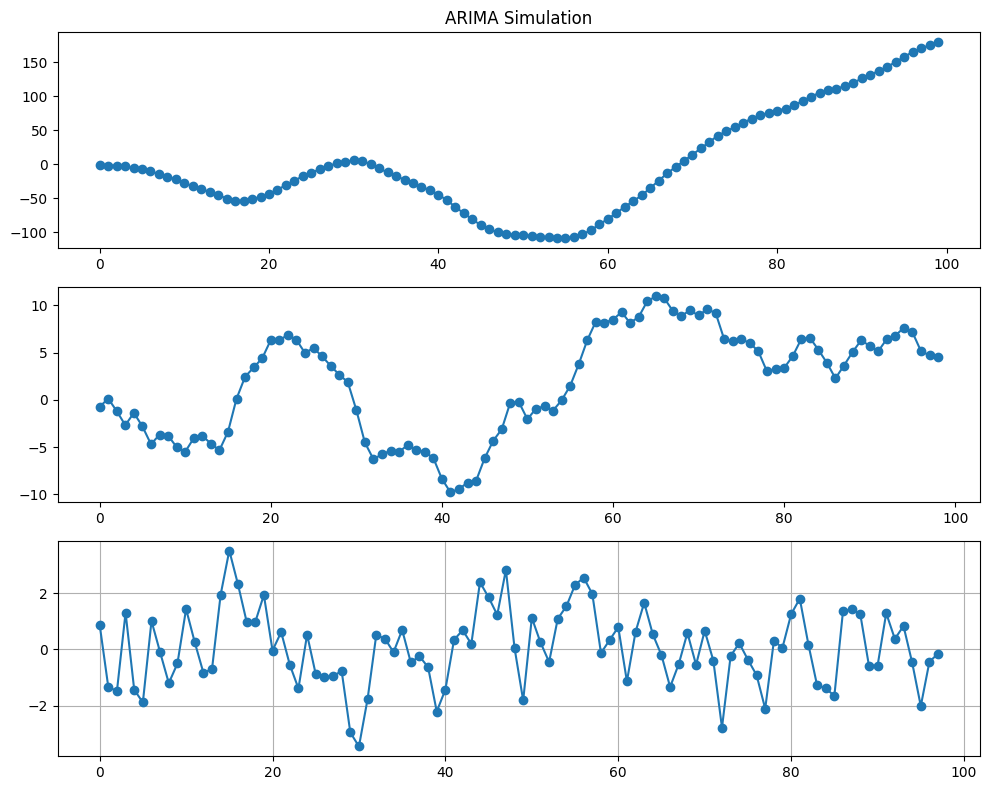

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 2차누적/1차누적/미누적 데이터생성 및 적분차수 이해
np.random.seed(123)
y2 = sm.tsa.ArmaProcess([1], [1, 0.6]).generate_sample(100).cumsum().cumsum()
y1 = np.diff(y2)
y0 = np.diff(y1)

plt.figure(figsize=(10,8))
plt.subplot(311)
plt.title("ARIMA Simulation")
plt.plot(y2, 'o-')
plt.subplot(312)
plt.plot(y1, 'o-')
plt.subplot(313)
plt.plot(y0, 'o-')
plt.tight_layout()
plt.grid()
plt.show()

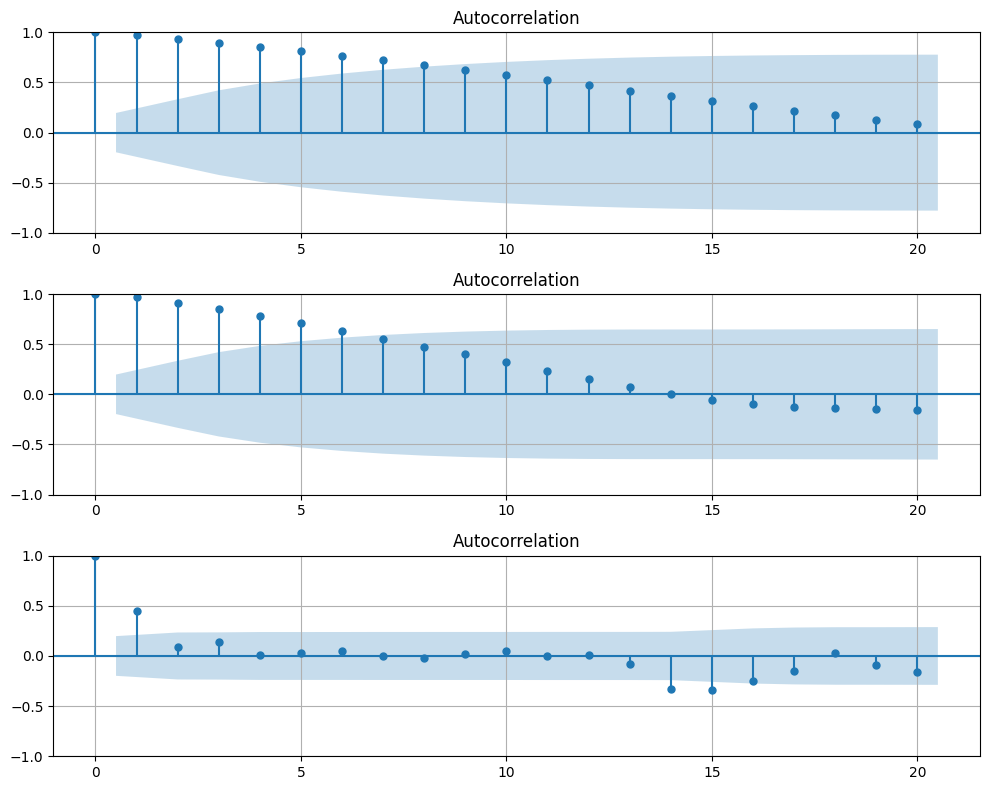

In [ ]:
# 2차누적/1차누적/미누적 데이터시각화
plt.figure(figsize=(10,8))
sm.tsa.graphics.plot_acf(y2, ax=plt.subplot(311))
plt.grid()
sm.tsa.graphics.plot_acf(y1, ax=plt.subplot(312))
plt.grid()
sm.tsa.graphics.plot_acf(y0, ax=plt.subplot(313))
plt.grid()
plt.tight_layout()
plt.show()

- **과차분(Over-differencing):**
> **"필요 적분차수 이상의 차분은 MA모형을 생성!"**
> - ARIMA(0,d,0) 모형을 따르는 $Y_t$를 $d$번 차분하면 백색잡음만 남음
> - 추가 1차분: MA(1), 추가 2차분: MA(2)
> - 과적합은 ACF/PACF의 수치를 오히려 증가시킬 수 있음

\begin{align*}
\Delta^d Y_t &= \epsilon_t \\
\Delta^{d+1} Y_t &= \epsilon_t - \epsilon_{t-1} \\
\Delta^{d+2} Y_t &= \epsilon_t - 2\epsilon_{t-1} + \epsilon_{t-2} \\
\end{align*}

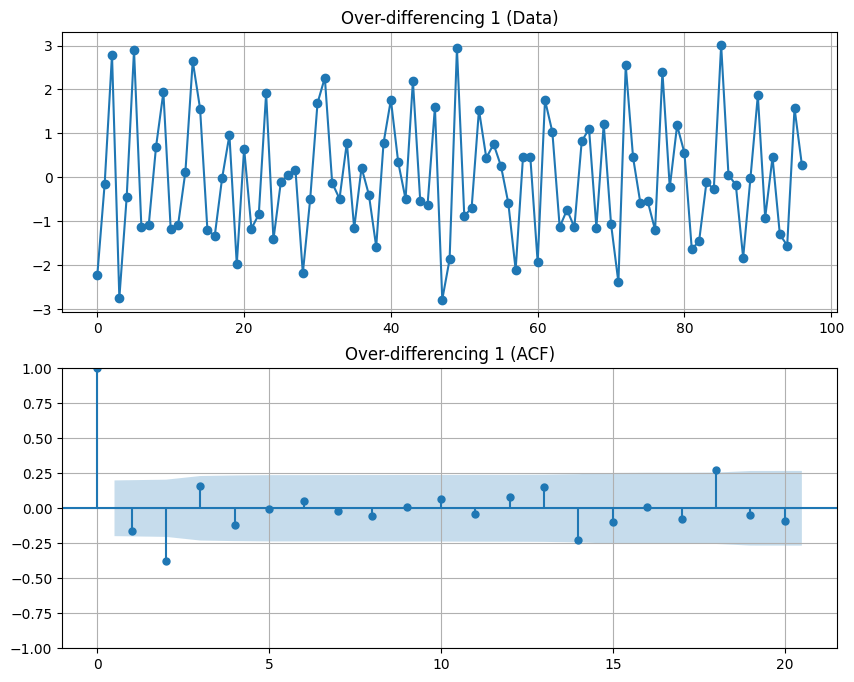

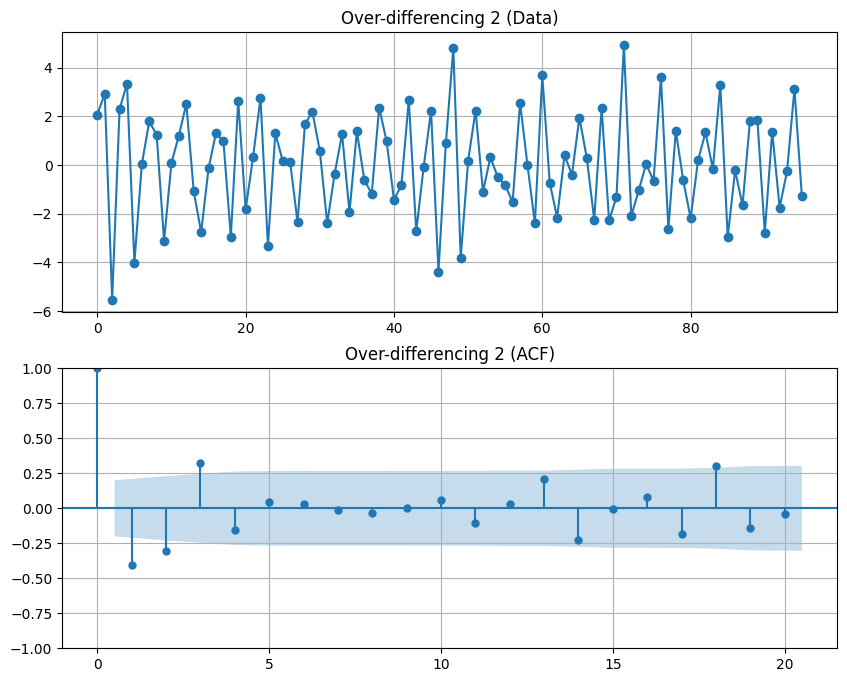

In [ ]:
# 과적차분 데이터 이해
y1_minus = np.diff(y0)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y1_minus, 'o-')
plt.title("Over-differencing 1 (Data)")
plt.grid()
sm.tsa.graphics.plot_acf(y1_minus, ax=plt.subplot(212))
plt.title("Over-differencing 1 (ACF)")
plt.grid()
plt.show()

y2_minus = np.diff(y1_minus)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y2_minus, 'o-')
plt.title("Over-differencing 2 (Data)")
plt.grid()
sm.tsa.graphics.plot_acf(y2_minus, ax=plt.subplot(212))
plt.title("Over-differencing 2 (ACF)")
plt.grid()
plt.show()